<a href="https://colab.research.google.com/github/HB-enpitsu/99-imabari/blob/main/2023%E5%B9%B4%E4%BB%8A%E6%B2%BB%E5%B8%82%E5%BD%93%E7%95%AA%E5%8C%BB%E3%81%AE%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# グラフを日本語化
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=fb9a7f11d61243c5c2aa835d4a42b363941ba51e1b098b1f963c6f1e73513dcc
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [4]:
# 2023年の当番医（1月～8月）
df0 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSRZKRfVRduOBvLxgsWQIRIDIewt-VTuFxBln5fwzPCYTpSEpOYWCnbnM8hzBCz4OH-U9sdkRaiupL0/pub?gid=0&single=true&output=csv")

In [5]:
# 日付変換
df0["date"] = pd.to_datetime(df0["日付"].str.extract("(?P<year>\d{4})年(?P<month>\d{1,2})月(?P<day>\d{1,2})日").astype(int))

In [6]:
df0

,日付,曜日,病院名,住所,TEL（昼）,TEL（夜）,診療科目,日中,夜間,date
0,2023年1月1日,祝日,瀬戸内海病院,今治市北宝来町２－４－９,0898-23-0655,NaN,指定なし,08:30～17:30,17:30～翌日08:30,2023-01-01
1,2023年1月1日,祝日,まつうらバンビクリニック,今治市北宝来町３－３－３４,0898-22-0573,0898-22-0573,小児科,09:00～17:00,NaN,2023-01-01
2,2023年1月1日,祝日,みぶ小児科,今治市北宝来町三丁目１番２７号,0898-23-7525,NaN,小児科,09:00～17:00,NaN,2023-01-01
3,2023年1月1日,祝日,片山医院,今治市吉海町幸新田７１,0897-84-2620,NaN,指定なし,09:00～17:00,NaN,2023-01-01
4,2023年1月2日,祝日,済生会今治病院,今治市喜田村７丁目１番６号,0898-47-2500,0898-47-2500,指定なし,08:30～17:30,17:30～翌日08:30,2023-01-02
...,...,...,...,...,...,...,...,...,...,...
378,2023年8月28日,月曜日,瀬戸内海病院,今治市北宝来町２－４－９,0898-23-0655,NaN,指定なし,08:30～17:30,17:30～翌日08:30,2023-08-28
379,2023年8月29日,火曜日,済生会今治病院,今治市喜田村７丁目１番６号,0898-47-2500,0898-47-2500,指定なし,08:30～17:30,17:30～翌日08:30,2023-08-29
380,2023年8月30日,水曜日,県立今治病院,今治市石井町４－５－５,0898-32-7111,0898-32-7111,指定なし,08:30～17:15,22:30～翌日08:30,2023-08-30
381,2023年8月30日,水曜日,今治セントラルクリニック,今治市松本町２丁目６番地６,0898-22-5251,0898-34-0088,指定なし,NaN,17:15～22:30,2023-08-30


## 曜日ごとの病院数をカウント

In [7]:
# 日付ごとの病院数をカウント
df1 = df0.groupby(["date", "曜日"]).size().rename("count").reset_index()

In [8]:
df1

,date,曜日,count
0,2023-01-01,祝日,4
1,2023-01-02,祝日,2
2,2023-01-03,火曜日,1
3,2023-01-04,水曜日,1
4,2023-01-05,木曜日,1
...,...,...,...
238,2023-08-27,日曜日,4
239,2023-08-28,月曜日,1
240,2023-08-29,火曜日,1
241,2023-08-30,水曜日,2


In [9]:
# １日の病院数カウント数の要約統計量
df1["count"].describe()

count    243.000000
mean       1.576132
std        0.956365
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: count, dtype: float64

In [10]:
# １日の病院数カウント数別に集計
df1["count"].value_counts()

1    165
2     35
3     24
4     19
Name: count, dtype: int64

<Axes: >

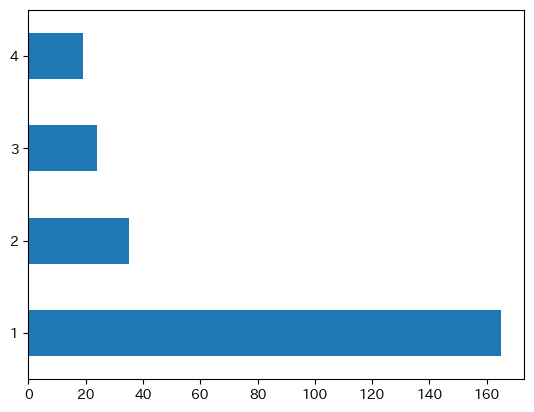

In [11]:
df1["count"].value_counts().plot.barh()

<Axes: ylabel='曜日'>

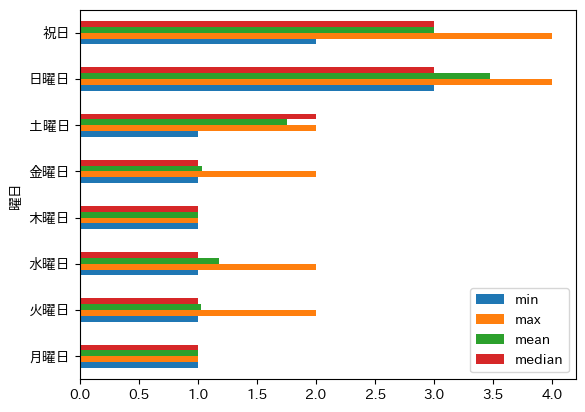

In [12]:
# 曜日ごとの病院数（最小・最大・平均・中央値）
df1.groupby("曜日")["count"].agg([min, max, "mean", "median"]).reindex(index=["月曜日", "火曜日", "水曜日", "木曜日", "金曜日", "土曜日", "日曜日", "祝日"]).plot.barh(stacked=False)

## 診療科目ごとに当番医の回数をカウント

In [13]:
df2 = df0.copy()

In [14]:
# 病院名のユニーク
df2["病院名"].unique()

array(['瀬戸内海病院', 'まつうらバンビクリニック', 'みぶ小児科', '片山医院', '済生会今治病院', 'はかた外科',
       '県立今治病院', '今治第一病院', '白石病院', '木原病院', '今治市医師会市民病院', 'しのざき整形外科',
       'あおい小児科', '医療法人\u3000喜多嶋診療所', '丹こどもクリニック', '有津むらかみクリニック', '広瀬病院',
       '大三島中央病院', '今治セントラルクリニック', '斎藤クリニック', '放射線第一病院', '松浦医院'],
      dtype=object)

In [15]:
# 住所が島の町名の場合、診療科目を島しょ部に変更
df2["診療科目"].mask(df2["住所"].str.contains("吉海町|宮窪町|伯方町|上浦町|大三島町|関前", na=False), "島しょ部", inplace=True)

In [16]:
# 診療科目のユニーク
df2["診療科目"].unique()

array(['指定なし', '小児科', '島しょ部', '内科'], dtype=object)

In [17]:
# 診療科目でグループ化
grp = df2.groupby("診療科目")

### 指定なし

<Axes: >

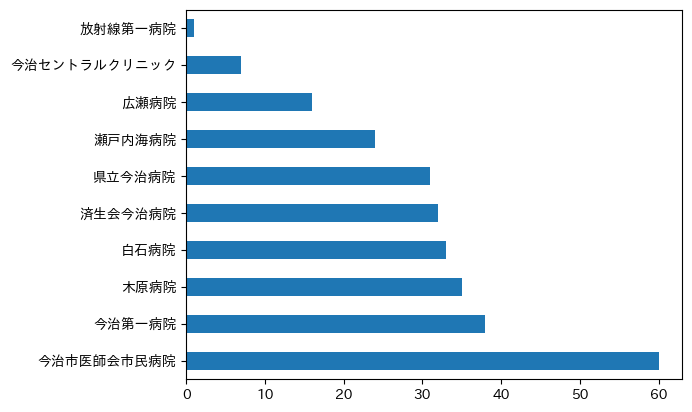

In [18]:
grp.get_group("指定なし")["病院名"].value_counts().plot.barh()

### 内科

<Axes: >

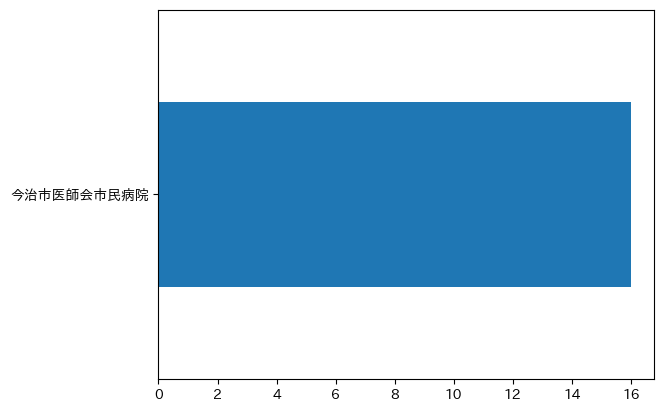

In [19]:
grp.get_group("内科")["病院名"].value_counts().plot.barh()

### 小児科

<Axes: >

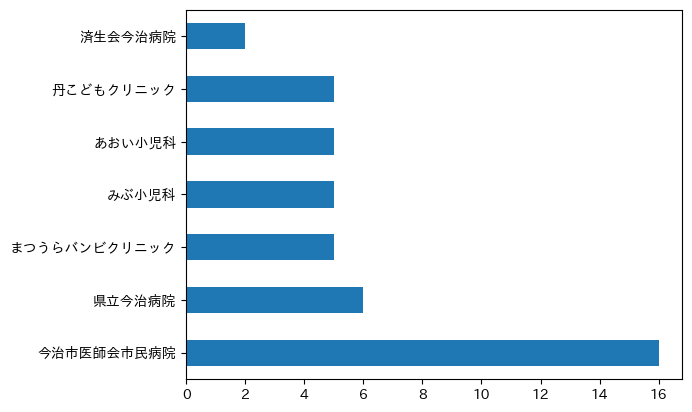

In [20]:
grp.get_group("小児科")["病院名"].value_counts().plot.barh()

### 島しょ部

<Axes: >

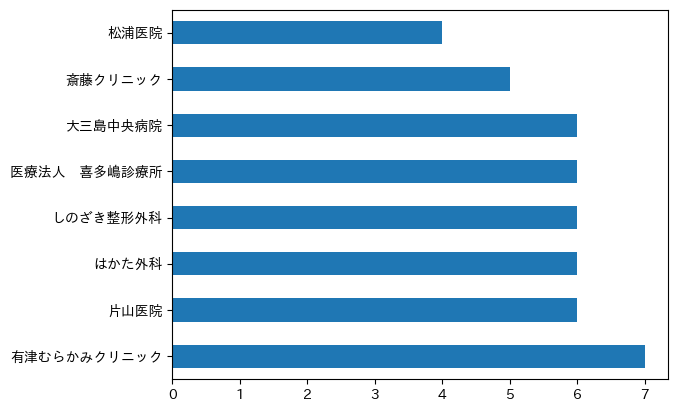

In [21]:
grp.get_group("島しょ部")["病院名"].value_counts().plot.barh()